In [ ]:
import numpy as np 
import numpy.linalg as nl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as so
import scipy.linalg as sl
#import jax.numpy as jnp
#from jax import grad

import math
import sklearn.datasets

# PCA SVD

## Part (a):

In [ ]:
# Reading the bivariate data set:
bivar_data =  pd.read_csv("Q6_bivariate.csv", header=None)
print(bivar_data)

            0         1
0    0.392419  0.140249
1    0.550044  0.406444
2    0.616431  0.503982
3    0.381552  0.278035
4    0.945593  0.506211
..        ...       ...
295  0.559648 -0.167941
296  0.881967 -0.568163
297  0.905806  0.813619
298  0.904662  0.804778
299  0.451035  0.382836

[300 rows x 2 columns]


In [ ]:
# Converting dataset to array:
bivar_data = bivar_data.values
print(bivar_data.shape, "\n")
print(bivar_data)

(300, 2) 

[[ 3.92419170e-01  1.40249280e-01]
 [ 5.50043824e-01  4.06443983e-01]
 [ 6.16431388e-01  5.03982363e-01]
 [ 3.81552384e-01  2.78035211e-01]
 [ 9.45593000e-01  5.06210890e-01]
 [ 2.29100793e-01  3.36496147e-01]
 [ 9.36813371e-01  8.28354115e-01]
 [ 7.62154312e-01  5.97312862e-01]
 [ 1.95103703e-01 -9.45910877e-03]
 [ 3.69509848e-01 -8.95449815e-01]
 [ 3.83943600e-01  1.17637534e-01]
 [ 7.70049856e-02 -1.04147461e-01]
 [ 5.18927400e-01 -2.86777941e-01]
 [ 4.40489979e-01  5.85101548e-01]
 [ 2.91668208e-01  1.55559311e-01]
 [ 7.60371571e-01  4.52131506e-01]
 [ 2.47364073e-01 -1.65042538e-01]
 [ 5.00156292e-01 -3.62647034e-01]
 [ 6.14005186e-01 -6.52174405e-02]
 [ 6.02583948e-01  3.16666009e-01]
 [ 8.78304488e-01  5.98161145e-01]
 [ 9.93230715e-01  1.09806319e+00]
 [ 9.03322706e-01  5.54417709e-01]
 [ 4.92786922e-01 -1.51161331e-02]
 [ 2.82031262e-01 -7.05896511e-03]
 [ 6.20905418e-01 -1.71039320e-01]
 [ 4.19526764e-01  2.88658874e-01]
 [ 8.18952268e-01  7.01321902e-01]
 [ 1.1324

In [ ]:
# Creating input and output vectors:
input = bivar_data[:, 0]
output = bivar_data[:, 1]

print("Shape of input vector:", input.shape)
print("Shape of output vector:", output.shape)
# print(input)
# print(output)

Shape of input vector: (300,)
Shape of output vector: (300,)


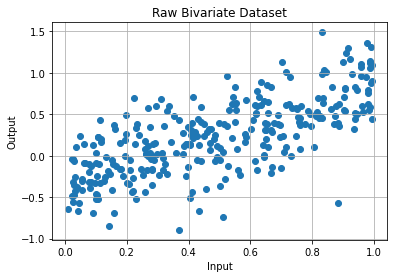

In [ ]:
# Plotting:
plt.scatter(input, output)

plt.title("Raw Bivariate Dataset")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

## Part (b):

In [ ]:
# Analytical Solution for OLS:
X = np.vstack([np.ones(len(input)), input]).T
print("Shape of X:", X.shape)
# print(X)

XT = np.matrix.transpose(X)
print("Shape of XT:", XT.shape)
# print(XT)

Y = np.vstack([output]).T
print("Shape of Y:", Y.shape)
# print(Y)

XT_X = np.matmul(XT, X)
print("Shape of XT_X:", XT_X.shape)
# print(XT_X)

XT_Y = np.matmul(XT, Y)
print("Shape of XT_y:", XT_Y.shape)
# print(XT_y)
print()

betas = np.matmul(np.linalg.inv(XT_X), XT_Y)
print("Shape of betas:", betas.shape)
print(betas)

Shape of X: (300, 2)
Shape of XT: (2, 300)
Shape of Y: (300, 1)
Shape of XT_X: (2, 2)
Shape of XT_y: (2, 1)

Shape of betas: (2, 1)
[[-0.30746734]
 [ 1.10517574]]


Shape of y: (300, 2)
Shape of X: (300, 2)


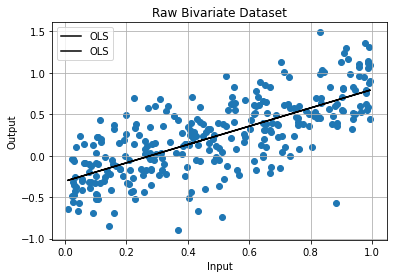

In [ ]:
# Defining Line of Best Fit:
y = betas[0] + betas[1]*X
print("Shape of y:", y.shape)
print("Shape of X:", X.shape)

# Redefining variable X:
X_ols = X
# Plotting:
plt.scatter(input, output)
plt.plot(X_ols, y, label = "OLS", color="k")


plt.title("Raw Bivariate Dataset")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()


## Part (c):

In [ ]:
# Redefining matrix X:
X = np.array(bivar_data)
print("Shape of Matrix X:", X.shape)
print(X)

Shape of Matrix X: (300, 2)
[[ 3.92419170e-01  1.40249280e-01]
 [ 5.50043824e-01  4.06443983e-01]
 [ 6.16431388e-01  5.03982363e-01]
 [ 3.81552384e-01  2.78035211e-01]
 [ 9.45593000e-01  5.06210890e-01]
 [ 2.29100793e-01  3.36496147e-01]
 [ 9.36813371e-01  8.28354115e-01]
 [ 7.62154312e-01  5.97312862e-01]
 [ 1.95103703e-01 -9.45910877e-03]
 [ 3.69509848e-01 -8.95449815e-01]
 [ 3.83943600e-01  1.17637534e-01]
 [ 7.70049856e-02 -1.04147461e-01]
 [ 5.18927400e-01 -2.86777941e-01]
 [ 4.40489979e-01  5.85101548e-01]
 [ 2.91668208e-01  1.55559311e-01]
 [ 7.60371571e-01  4.52131506e-01]
 [ 2.47364073e-01 -1.65042538e-01]
 [ 5.00156292e-01 -3.62647034e-01]
 [ 6.14005186e-01 -6.52174405e-02]
 [ 6.02583948e-01  3.16666009e-01]
 [ 8.78304488e-01  5.98161145e-01]
 [ 9.93230715e-01  1.09806319e+00]
 [ 9.03322706e-01  5.54417709e-01]
 [ 4.92786922e-01 -1.51161331e-02]
 [ 2.82031262e-01 -7.05896511e-03]
 [ 6.20905418e-01 -1.71039320e-01]
 [ 4.19526764e-01  2.88658874e-01]
 [ 8.18952268e-01  7.013219

In [ ]:
# Defining data centering function:
def center(arr):   
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: centered array
    '''    
    rows, cols = arr.shape   
    newArray = np.zeros((rows, cols))
    tempArray = np.zeros(rows)
    
    for c in range(cols):
        mean = np.mean(X[:,c])
        tempArray = np.array([])
        
        for e in X[:,c]:
            tempArray = np.append(tempArray, (e - mean))
            
        newArray[:,c] = tempArray
    
    return newArray

In [ ]:
# Centering X:
X_cen = center(X)
print(X_cen)

[[-9.25808927e-02 -8.82936818e-02]
 [ 6.50437612e-02  1.77901022e-01]
 [ 1.31431325e-01  2.75439401e-01]
 [-1.03447679e-01  4.94922493e-02]
 [ 4.60592937e-01  2.77667928e-01]
 [-2.55899270e-01  1.07953185e-01]
 [ 4.51813308e-01  5.99811153e-01]
 [ 2.77154249e-01  3.68769901e-01]
 [-2.89896360e-01 -2.38002070e-01]
 [-1.15490215e-01 -1.12399278e+00]
 [-1.01056463e-01 -1.10905428e-01]
 [-4.07995077e-01 -3.32690423e-01]
 [ 3.39273370e-02 -5.15320903e-01]
 [-4.45100835e-02  3.56558586e-01]
 [-1.93331855e-01 -7.29836509e-02]
 [ 2.75371509e-01  2.23588545e-01]
 [-2.37635990e-01 -3.93585500e-01]
 [ 1.51562291e-02 -5.91189996e-01]
 [ 1.29005124e-01 -2.93760402e-01]
 [ 1.17583886e-01  8.81230475e-02]
 [ 3.93304426e-01  3.69618184e-01]
 [ 5.08230652e-01  8.69520229e-01]
 [ 4.18322643e-01  3.25874748e-01]
 [ 7.78685905e-03 -2.43659095e-01]
 [-2.02968801e-01 -2.35601927e-01]
 [ 1.35905355e-01 -3.99582282e-01]
 [-6.54732990e-02  6.01159118e-02]
 [ 3.33952205e-01  4.72778941e-01]
 [-3.71750798e-01 -5

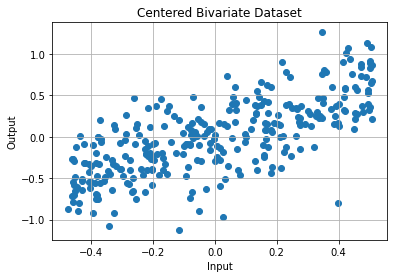

In [ ]:
# Plotting Centered Data:
plt.scatter(X_cen[:, 0], X_cen[:, 1])
plt.title("Centered Bivariate Dataset")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

In [ ]:
# Applying PCA:

In [ ]:
# SVD:
u, s, vh = nl.svd(X_cen, full_matrices=True)
print("Shape of Data Matrix X_cen:", X_cen.shape)
print("Shape of U:", u.shape)
print("Shape of Singular Values Array:", s.shape)
print("Shape of V*:", vh.shape)

Shape of Data Matrix X_cen: (300, 2)
Shape of U: (300, 300)
Shape of Singular Values Array: (2,)
Shape of V*: (2, 2)


In [ ]:
# Creating the Rectangular Diagonal Matrix Using Singular Values:
zeros = np.zeros((X_cen.shape[0], X_cen.shape[1]))
for i in range(s.shape[0]):
    zeros[i, i] = s[i]

D = zeros
print("Shape of Diagonal Matrix:", D.shape, "\n")
# print(D)

Shape of Diagonal Matrix: (300, 2) 



In [ ]:
# Computing C:
C = u@D
print("Shape of Matrix C:", C.shape)
# print(C)

Shape of Matrix C: (300, 2)


In [ ]:
# Obtaining First Principle Component:
C_1 = C[:, 0]
print("Shape of First Principle Component:", C_1.shape)

Shape of First Principle Component: (300,)


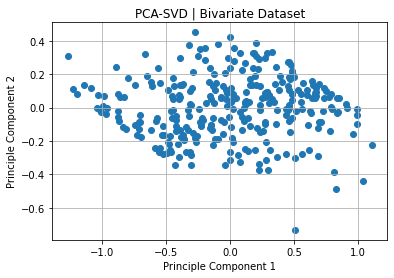

In [ ]:
# Scatter Plot:
plt.scatter(C[:, 0], C[:, 1])

plt.title("PCA-SVD | Bivariate Dataset")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.grid()
plt.show()

In [ ]:
# Using sklearn for visualizing PCA solution for data:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
PCA(x)

PCA(n_components=array([-0.1502575 , -0.22888714, -0.28511172, -0.31342757, -0.31106295,
       -0.27824932, -0.21819871, -0.13678929, -0.04198998,  0.0569196 ,
        0.1502575 ,  0.22888714,  0.28511172,  0.31342757,  0.31106295,
        0.27824932,  0.21819871,  0.13678929,  0.04198998, -0.0569196 ]))

In [ ]:
print(pca.components_)

[[ 0.48349886  0.87534499]
 [ 0.87534499 -0.48349886]]


In [ ]:
print(pca.explained_variance_)

[0.26052685 0.03382011]


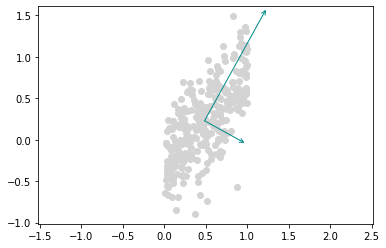

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    color = 'darkcyan',
                    shrinkA=0, shrinkB=0,
                    label="PCA")
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    ax.legend
# plot data
plt.scatter(input, output, color = 'lightgrey')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

    
plt.axis('equal');

In [ ]:
pca.explained_variance_

array([0.26052685, 0.03382011])

## Part (d):

In [ ]:
from scipy import odr

def f(B, x):
    return B[0]*x + B[1]

linear_model = odr.Model(f)
data = odr.Data(x=input, y=output, wd=4) 

odreg = odr.ODR(data, linear_model, beta0 =[0., 0.])
Output = odreg.run()
slope, intercept = Output.beta

In [ ]:
wd = [1, 2, 10, 100]
B = []
for i in wd:
    data = odr.Data(x=input, y=output, wd=i) 
    odreg = odr.ODR(data, linear_model, beta0 =[0., 0.])
    Output = odreg.run()
    slope, intercept = Output.beta
    b = [slope, intercept]
    B.append(b)

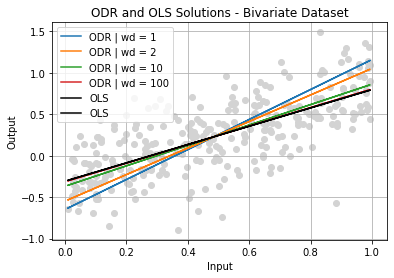

In [ ]:
# Plotting:
plt.scatter(input, output, color = 'lightgrey')

c = 0

for i in B:
    plt.plot(input, f(i, input), label="ODR | wd = {}".format(wd[c]))
    c += 1

plt.plot(X_ols, y, label = "OLS", color="k")

plt.title("ODR and OLS Solutions - Bivariate Dataset")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()

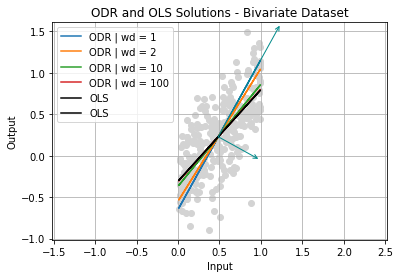

In [ ]:
# Plotting:
plt.scatter(input, output, color = 'lightgrey')

c = 0

for i in B:
    plt.plot(input, f(i, input), label="ODR | wd = {}".format(wd[c]))
    c += 1

plt.plot(X_ols, y, label = "OLS", color="k")


for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

plt.title("ODR and OLS Solutions - Bivariate Dataset")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Part (e):

The ODR solution closest to the OLS solution is the one with the greatest weight coefficient (namely, wd=100). The ODR solution closest to the PCA solution is the one with the least weight coefficient (namely, wd=1).  

The ordinary least square (OLS) estimate of $\mathrm{Y}$ on $\mathrm{X}$ will minimize the squared vertical distance from the points to the regression line. The OLS estimate represents the case when weight coeffiecient=$\infty$ in the ODR. 

As errors get larger, ODR will outperform OLS, and get closer to the PCA solution, which aims for the least (Euclidean) distance or
error between the original points and the projected points.